In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##**LOAD DATA**

In [0]:
data = pd.read_csv("credit_card_clustering.csv")

In [112]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


##**EXPLORATORY DATA ANALYSIS**

###How many rows/columns are there?

In [113]:
data.shape

(8950, 18)

###How many customers are there?

In [114]:
data['CUST_ID'].nunique()

8950

*We have 8.950 Customer IDs*

###What is the tenure distribution of our customers?

In [115]:
data['TENURE'].value_counts()

12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64

*Most of our customers are using credit card for 12 months*

###How does the credit limit distribution of our customers look like?

Descriptive Statistics

In [116]:
data['CREDIT_LIMIT'].describe(np.arange(0.1, 1, 0.1))

count     8949.000000
mean      4494.449450
std       3638.815725
min         50.000000
10%       1200.000000
20%       1500.000000
30%       2000.000000
40%       2500.000000
50%       3000.000000
60%       4200.000000
70%       6000.000000
80%       7000.000000
90%       9500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

Count of Null Credit Limit Values

In [117]:
data['CREDIT_LIMIT'].isna().value_counts()

False    8949
True        1
Name: CREDIT_LIMIT, dtype: int64

In [0]:
#Replace null with 0
data['CREDIT_LIMIT'].fillna(0, inplace = True)

In [119]:
data['CREDIT_LIMIT'].isna().value_counts()

False    8950
Name: CREDIT_LIMIT, dtype: int64

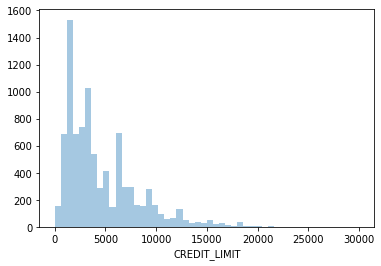

In [120]:
sns.distplot(data['CREDIT_LIMIT'], kde=False)

###How does balance distribution of our customers look like?

In [121]:
data['BALANCE'].describe(np.arange(0.1, 1, 0.1))

count     8950.000000
mean      1564.474828
std       2081.531879
min          0.000000
10%         23.575529
20%         77.238026
30%        207.176552
40%        467.021989
50%        873.385231
60%       1207.815587
70%       1698.588855
80%       2571.434263
90%       4338.563657
max      19043.138560
Name: BALANCE, dtype: float64

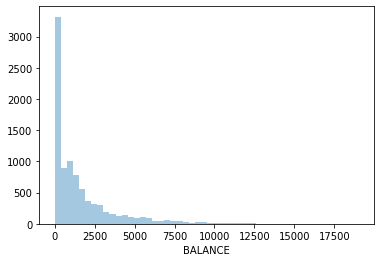

In [122]:
sns.distplot(data['BALANCE'], kde=False)

###How does the purchase frequency distribution of our customers look like?

In [123]:
data['PURCHASES_FREQUENCY'].describe(np.arange(0.1, 1, 0.1))

count    8950.000000
mean        0.490351
std         0.401371
min         0.000000
10%         0.000000
20%         0.000000
30%         0.083333
40%         0.250000
50%         0.500000
60%         0.666667
70%         0.857143
80%         1.000000
90%         1.000000
max         1.000000
Name: PURCHASES_FREQUENCY, dtype: float64

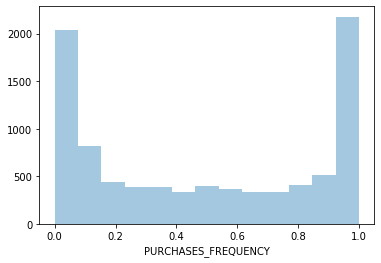

In [124]:
sns.distplot(data['PURCHASES_FREQUENCY'], kde=False)

###How does the cash advance frequency distribution of our customers look like?

In [125]:
data['CASH_ADVANCE_FREQUENCY'].describe(np.arange(0.1, 1, 0.1))

count    8950.000000
mean        0.135144
std         0.200121
min         0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.083333
70%         0.166667
80%         0.250000
90%         0.416667
max         1.500000
Name: CASH_ADVANCE_FREQUENCY, dtype: float64

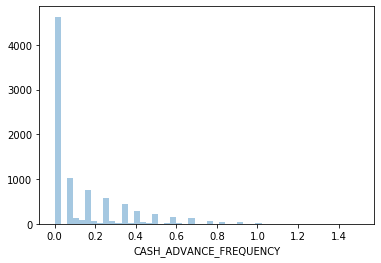

In [126]:
sns.distplot(data['CASH_ADVANCE_FREQUENCY'], kde=False)

##**CLUSTERING**

In [0]:
from sklearn.cluster import KMeans

In [128]:
# Get features we need
features = ['CREDIT_LIMIT', 'BALANCE', 'PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY']
X = data[features]

# Convert categorical to numeric
# X = pd.get_dummies(X_raw)
# X_raw.head()

X.head()

,CREDIT_LIMIT,BALANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY
0,1000.0,40.900749,0.166667,0.000000
1,7000.0,3202.467416,0.000000,0.250000
2,7500.0,2495.148862,1.000000,0.000000
3,7500.0,1666.670542,0.083333,0.083333
4,1200.0,817.714335,0.083333,0.000000


###Choosing Optimal K

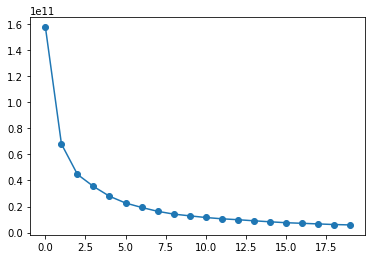

In [129]:
# get the sum of squared errors and find where the reduction of the errors are saturated with the increase of k
squared_errors = []

for num_iter in range(1,21):
  km = KMeans(n_clusters=num_iter, random_state=42)
  km.fit(X)
  squared_errors.append(km.inertia_)

# check for the best k to use
plt.plot(squared_errors, marker = 'o')

Using the elbow method, I decided to use *k=5*.

In [0]:
# Clustering using KMeans. We choose 5 clusters
km = KMeans(n_clusters = 5, random_state = 42)

# Fit data to model
km.fit(X)

# Get labels
labels = km.predict(X)

# Create new dataframe with features and labels
new_data = X.copy()

# Add labels to new_data dataframe
new_data['labels'] = labels

In [131]:
new_data.head()

,CREDIT_LIMIT,BALANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,labels
0,1000.0,40.900749,0.166667,0.000000,0
1,7000.0,3202.467416,0.000000,0.250000,2
2,7500.0,2495.148862,1.000000,0.000000,2
3,7500.0,1666.670542,0.083333,0.083333,3
4,1200.0,817.714335,0.083333,0.000000,0


###Deep Dive to each Clusters

*Let each clusters be type of Students (using credit limit as monthly allowance)*

In [132]:
# Cluster 0
cluster_0 = new_data[new_data['labels']==0]
cluster_0.describe()

,CREDIT_LIMIT,BALANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,labels
count,4845.000000,4845.000000,4845.000000,4845.000000,4845.0
mean,1926.895654,817.447806,0.444364,0.114711,0.0
std,819.589753,797.258051,0.396131,0.168778,0.0
min,0.000000,0.000000,0.000000,0.000000,0.0
25%,1200.000000,86.793633,0.000000,0.000000,0.0
50%,1800.000000,637.379659,0.333333,0.000000,0.0
75%,2500.000000,1298.539837,0.875000,0.166667,0.0
max,3750.000000,3676.070324,1.000000,1.090909,0.0


Poorest Kid among the class, low budget with high necessity.
--> These are still good customers for CC provider given that they have only small credit limit, thus, they still tend to purchase. CC provider can offer these clients with higher credit limit to increase their spending habits.

In [133]:
# Cluster 1
cluster_1 = new_data[new_data['labels']==1]
cluster_1.describe()

,CREDIT_LIMIT,BALANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,labels
count,604.000000,604.000000,604.000000,604.000000,604.0
mean,11753.476821,1203.889987,0.629860,0.083976,1.0
std,2734.932398,1359.179512,0.388035,0.177840,0.0
min,8800.000000,0.000000,0.000000,0.000000,1.0
25%,10000.000000,131.322105,0.250000,0.000000,1.0
50%,11000.000000,506.955928,0.809091,0.000000,1.0
75%,13000.000000,2207.449049,1.000000,0.083333,1.0
max,25000.000000,4968.771623,1.000000,0.916667,1.0


Rich Kid, shopping is life. --> These segment can be classified as the greatest transactors who tend to fully pay their credits given that they have low balance.


In [134]:
# Cluster 2
cluster_2 = new_data[new_data['labels']==2]
cluster_2.describe()

,CREDIT_LIMIT,BALANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,labels
count,1066.000000,1066.000000,1066.000000,1066.000000,1066.0
mean,7015.670305,4463.909280,0.423202,0.301499,2.0
std,1602.483689,1349.785413,0.410153,0.255027,0.0
min,4000.000000,1773.445786,0.000000,0.000000,2.0
25%,6000.000000,3464.439923,0.000000,0.083333,2.0
50%,7000.000000,4347.213453,0.333333,0.250000,2.0
75%,8500.000000,5354.430774,0.875000,0.500000,2.0
max,10500.000000,8315.894044,1.000000,1.500000,2.0


Semi-Rich Kids. Purchases moderately, uses their Credit Cards as ATM.
--> This segment is characterized by customers who have high balances and cash advances which indicates that they are one of the lucrative segments for the credit card provider. These are typically known as revolvers who might be using their credit cards as a loan.

In [135]:
# Cluster 3
cluster_3 = new_data[new_data['labels']==3]
cluster_3.describe()

,CREDIT_LIMIT,BALANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,labels
count,2085.000000,2085.000000,2085.000000,2085.000000,2085.0
mean,5571.133881,798.589969,0.584565,0.081644,3.0
std,1326.711729,884.236996,0.381823,0.161908,0.0
min,3750.000000,0.000000,0.000000,0.000000,3.0
25%,4500.000000,73.507271,0.166667,0.000000,3.0
50%,5500.000000,400.462305,0.666667,0.000000,3.0
75%,6500.000000,1395.011267,1.000000,0.083333,3.0
max,8500.000000,3534.253718,1.000000,1.166667,3.0


Semi-Rich Kids but great in budgeting.
--> These are actually good customers as they are frequent shoppers. CC provider should encourage them to increase their spending by offering them cashbacks.

In [136]:
# Cluster 4
cluster_4 = new_data[new_data['labels']==4]
cluster_4.describe()

,CREDIT_LIMIT,BALANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,labels
count,350.000000,350.000000,350.000000,350.000000,350.0
mean,13404.000000,8259.366168,0.529447,0.318342,4.0
std,3207.427537,2598.714417,0.421216,0.276188,0.0
min,8000.000000,1409.256223,0.000000,0.000000,4.0
25%,11112.500000,6461.244543,0.000000,0.083333,4.0
50%,12500.000000,7903.448143,0.500000,0.250000,4.0
75%,15000.000000,9355.319654,1.000000,0.500000,4.0
max,30000.000000,19043.138560,1.000000,1.100000,4.0


Richest kid, not afraid in spending, friend for all season.
--> Both transactor and revolver clients. Best Clients. Credit Card provider can offer these clients with even more higher credit limit.